1. [Problem Statement](#section1)<br>
2. [Loading the libraries](#section2)<br>
3. [Data Loading and Description](#section3)<br>
4. [Preprocessing the data](#section4)<br>
5. [Exploratory Data Analysis](#section5)<br>
6. [Training and testing the Model](#section6)<br>
    - 6.1 [Splitting data into training and test datasets](#section601)<br>
7. [Deep Learning using Keras API](#section7)<br>
    - 7.1 [Building deep learning model](#section701)<br>
    - 7.2 [Exploring Callbacks, Dropouts and Regularization](#section702)<br> 
8. [Conclusion](#section8)

### 1. Problem Statement <a id=section1></a>

Telecom Customer Churn identification is a unique case study where we calculate if a user will churn or not based on various personal and usage details of the user with the company.

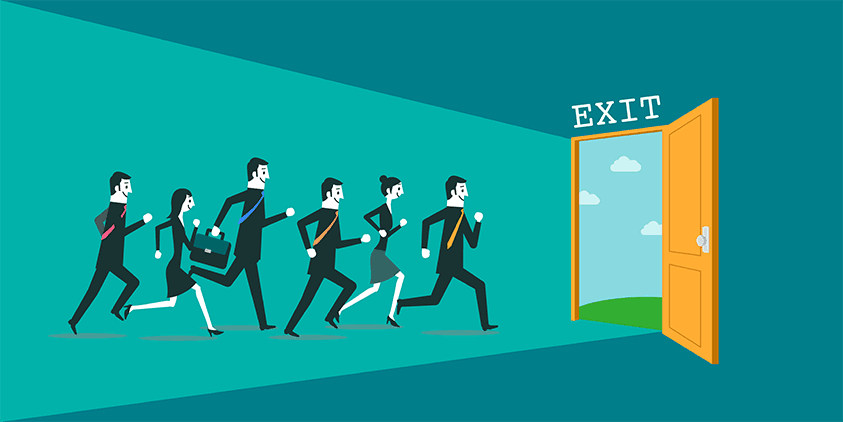

### 2. Loading the Libraries <a id=section2></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')                  # To apply seaborn whitegrid style to the plots.
%matplotlib inline

import seaborn as sns
sns.set(style='whitegrid', font_scale=1.3, color_codes=True)      # To adjust seaborn settings for the plots.

import warnings
warnings.filterwarnings('ignore')                   # To suppress all the warnings in the notebook.

## 3. Data Loading and Description <a id=section3></a>

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/anuragvyas1989/Python-Machine-Learning-Projects/main/Content%20Based%20Recommendation%20System/cell2celltrain.csv')
df.head()

,CustomerID,Churn,MonthlyRevenue,MonthlyMinutes,TotalRecurringCharge,DirectorAssistedCalls,OverageMinutes,RoamingCalls,PercChangeMinutes,PercChangeRevenues,DroppedCalls,BlockedCalls,UnansweredCalls,CustomerCareCalls,ThreewayCalls,ReceivedCalls,OutboundCalls,InboundCalls,PeakCallsInOut,OffPeakCallsInOut,DroppedBlockedCalls,CallForwardingCalls,CallWaitingCalls,MonthsInService,UniqueSubs,ActiveSubs,ServiceArea,Handsets,HandsetModels,CurrentEquipmentDays,AgeHH1,AgeHH2,ChildrenInHH,HandsetRefurbished,HandsetWebCapable,TruckOwner,RVOwner,Homeownership,BuysViaMailOrder,RespondsToMailOffers,OptOutMailings,NonUSTravel,OwnsComputer,HasCreditCard,RetentionCalls,RetentionOffersAccepted,NewCellphoneUser,NotNewCellphoneUser,ReferralsMadeBySubscriber,IncomeGroup,OwnsMotorcycle,AdjustmentsToCreditRating,HandsetPrice,MadeCallToRetentionTeam,CreditRating,PrizmCode,Occupation,MaritalStatus
0,3000002,Yes,24.00,219.0,22.0,0.25,0.0,0.0,-157.0,-19.0,0.7,0.7,6.3,0.0,0.0,97.2,0.0,0.0,58.0,24.0,1.3,0.0,0.3,61,2,1,SEAPOR503,2.0,2.0,361.0,62.0,0.0,No,No,Yes,No,No,Known,Yes,Yes,No,No,Yes,Yes,1,0,No,No,0,4,No,0,30,Yes,1-Highest,Suburban,Professional,No
1,3000010,Yes,16.99,10.0,17.0,0.00,0.0,0.0,-4.0,0.0,0.3,0.0,2.7,0.0,0.0,0.0,0.0,0.0,5.0,1.0,0.3,0.0,0.0,58,1,1,PITHOM412,2.0,1.0,1504.0,40.0,42.0,Yes,No,No,No,No,Known,Yes,Yes,No,No,Yes,Yes,0,0,Yes,No,0,5,No,0,30,No,4-Medium,Suburban,Professional,Yes
2,3000014,No,38.00,8.0,38.0,0.00,0.0,0.0,-2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.4,0.3,0.0,1.3,3.7,0.0,0.0,0.0,60,1,1,MILMIL414,1.0,1.0,1812.0,26.0,26.0,Yes,No,No,No,No,Unknown,No,No,No,No,No,Yes,0,0,Yes,No,0,6,No,0,Unknown,No,3-Good,Town,Crafts,Yes
3,3000022,No,82.28,1312.0,75.0,1.24,0.0,0.0,157.0,8.1,52.0,7.7,76.0,4.3,1.3,200.3,370.3,147.0,555.7,303.7,59.7,0.0,22.7,59,2,2,PITHOM412,9.0,4.0,458.0,30.0,0.0,No,No,Yes,No,No,Known,Yes,Yes,No,No,No,Yes,0,0,Yes,No,0,6,No,0,10,No,4-Medium,Other,Other,No
4,3000026,Yes,17.14,0.0,17.0,0.00,0.0,0.0,0.0,-0.2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,53,2,2,OKCTUL918,4.0,3.0,852.0,46.0,54.0,No,No,No,No,No,Known,Yes,Yes,No,No,Yes,Yes,0,0,No,Yes,0,9,No,1,10,No,1-Highest,Other,Professional,Yes


## 4. Preprocessing the data <a id=section4></a>

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51047 entries, 0 to 51046
Data columns (total 58 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   CustomerID                 51047 non-null  int64  
 1   Churn                      51047 non-null  object 
 2   MonthlyRevenue             50891 non-null  float64
 3   MonthlyMinutes             50891 non-null  float64
 4   TotalRecurringCharge       50891 non-null  float64
 5   DirectorAssistedCalls      50891 non-null  float64
 6   OverageMinutes             50891 non-null  float64
 7   RoamingCalls               50891 non-null  float64
 8   PercChangeMinutes          50680 non-null  float64
 9   PercChangeRevenues         50680 non-null  float64
 10  DroppedCalls               51047 non-null  float64
 11  BlockedCalls               51047 non-null  float64
 12  UnansweredCalls            51047 non-null  float64
 13  CustomerCareCalls          51047 non-null  flo

In [4]:
df.isnull().sum()

CustomerID                     0
Churn                          0
MonthlyRevenue               156
MonthlyMinutes               156
TotalRecurringCharge         156
DirectorAssistedCalls        156
OverageMinutes               156
RoamingCalls                 156
PercChangeMinutes            367
PercChangeRevenues           367
DroppedCalls                   0
BlockedCalls                   0
UnansweredCalls                0
CustomerCareCalls              0
ThreewayCalls                  0
ReceivedCalls                  0
OutboundCalls                  0
InboundCalls                   0
PeakCallsInOut                 0
OffPeakCallsInOut              0
DroppedBlockedCalls            0
CallForwardingCalls            0
CallWaitingCalls               0
MonthsInService                0
UniqueSubs                     0
ActiveSubs                     0
ServiceArea                   24
Handsets                       1
HandsetModels                  1
CurrentEquipmentDays           1
AgeHH1    

In [5]:
df.nunique()

CustomerID                   51047
Churn                            2
MonthlyRevenue               12665
MonthlyMinutes                2719
TotalRecurringCharge           214
DirectorAssistedCalls          146
OverageMinutes                 746
RoamingCalls                   530
PercChangeMinutes             2262
PercChangeRevenues            2899
DroppedCalls                   285
BlockedCalls                   373
UnansweredCalls                840
CustomerCareCalls              185
ThreewayCalls                   78
ReceivedCalls                 6121
OutboundCalls                  787
InboundCalls                   472
PeakCallsInOut                1839
OffPeakCallsInOut             1669
DroppedBlockedCalls            447
CallForwardingCalls             31
CallWaitingCalls               223
MonthsInService                 56
UniqueSubs                      15
ActiveSubs                      12
ServiceArea                    747
Handsets                        23
HandsetModels       

In [6]:
df.drop(['CustomerID'], axis=1,inplace=True) # customer id is unique to each customer and is not required for model building.

In [7]:
# Imputing the missing values with mean and mode 
df['MonthlyRevenue'] = df['MonthlyRevenue'].fillna(df['MonthlyRevenue'].mean())
df['MonthlyMinutes'] = df['MonthlyMinutes'].fillna(df['MonthlyMinutes'].mean())
df['TotalRecurringCharge'] = df['TotalRecurringCharge'].fillna(df['TotalRecurringCharge'].mean())
df['DirectorAssistedCalls'] = df['DirectorAssistedCalls'].fillna(df['DirectorAssistedCalls'].mean())
df['OverageMinutes'] = df['OverageMinutes'].fillna(df['OverageMinutes'].mean())
df['RoamingCalls'] = df['RoamingCalls'].fillna(df['RoamingCalls'].mean())
df['PercChangeMinutes'] = df['PercChangeMinutes'].fillna(df['PercChangeMinutes'].mean())
df['PercChangeRevenues'] = df['PercChangeRevenues'].fillna(df['PercChangeRevenues'].mean())
df['ServiceArea'] = df['ServiceArea'].fillna(df['ServiceArea'].mode()[0])
df['Handsets'] = df['Handsets'].fillna(df['Handsets'].mode()[0])
df['HandsetModels'] = df['HandsetModels'].fillna(df['HandsetModels'].mode()[0])
df['CurrentEquipmentDays'] = df['CurrentEquipmentDays'].fillna(df['CurrentEquipmentDays'].mean())
df['AgeHH1'] = df['AgeHH1'].fillna(df['AgeHH1'].mode()[0])
df['AgeHH2'] = df['AgeHH2'].fillna(df['AgeHH2'].mode()[0])

In [8]:
df.isnull().sum()

Churn                        0
MonthlyRevenue               0
MonthlyMinutes               0
TotalRecurringCharge         0
DirectorAssistedCalls        0
OverageMinutes               0
RoamingCalls                 0
PercChangeMinutes            0
PercChangeRevenues           0
DroppedCalls                 0
BlockedCalls                 0
UnansweredCalls              0
CustomerCareCalls            0
ThreewayCalls                0
ReceivedCalls                0
OutboundCalls                0
InboundCalls                 0
PeakCallsInOut               0
OffPeakCallsInOut            0
DroppedBlockedCalls          0
CallForwardingCalls          0
CallWaitingCalls             0
MonthsInService              0
UniqueSubs                   0
ActiveSubs                   0
ServiceArea                  0
Handsets                     0
HandsetModels                0
CurrentEquipmentDays         0
AgeHH1                       0
AgeHH2                       0
ChildrenInHH                 0
HandsetR

## 5. Exploratory Data Analysis <a id=section5></a>

In [12]:
df.groupby(['Churn']).mean()

,MonthlyRevenue,MonthlyMinutes,TotalRecurringCharge,DirectorAssistedCalls,OverageMinutes,RoamingCalls,PercChangeMinutes,PercChangeRevenues,DroppedCalls,BlockedCalls,UnansweredCalls,CustomerCareCalls,ThreewayCalls,ReceivedCalls,OutboundCalls,InboundCalls,PeakCallsInOut,OffPeakCallsInOut,DroppedBlockedCalls,CallForwardingCalls,CallWaitingCalls,MonthsInService,UniqueSubs,ActiveSubs,Handsets,HandsetModels,CurrentEquipmentDays,AgeHH1,AgeHH2,RetentionCalls,RetentionOffersAccepted,ReferralsMadeBySubscriber,IncomeGroup,AdjustmentsToCreditRating
Churn,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
No,59.172736,542.506500,47.756918,0.922804,39.019771,1.168506,-5.995737,-1.469334,6.100094,4.124188,29.014991,1.984142,0.31657,118.767558,26.100793,8.541111,93.222485,70.057714,10.289303,0.012825,1.931666,18.639641,1.505284,1.347672,1.833443,1.581820,363.801617,31.179684,21.037979,0.028622,0.015109,0.054161,4.349901,0.058069
Yes,57.999035,484.026493,44.540827,0.827118,42.517568,1.403558,-25.261707,-0.506936,5.792638,3.990538,26.495745,1.584597,0.25504,105.000598,23.591720,7.281483,83.947312,61.705717,9.833696,0.010924,1.615335,19.044321,1.598532,1.370811,1.736932,1.501733,421.903881,29.793080,20.099857,0.058392,0.026103,0.046904,4.261845,0.043641


In [13]:
churn_df=df[df['Churn']=='Yes']
non_churn_df= df[df['Churn']=='No']
churned= df[df['Churn']=='Yes'].shape[0]
notchurned= df[df['Churn']=='No'].shape[0]
print("Total Churned customer {} ".format(churned))

Total Churned customer 14711 


Text(0.5, 1.0, 'Customers churned and not churned')

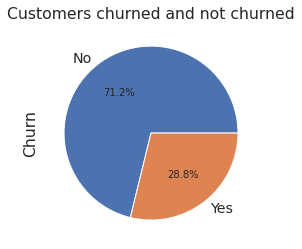

In [14]:
df['Churn'].value_counts().plot(kind='pie',autopct='%1.1f%%')
plt.title('Customers churned and not churned')

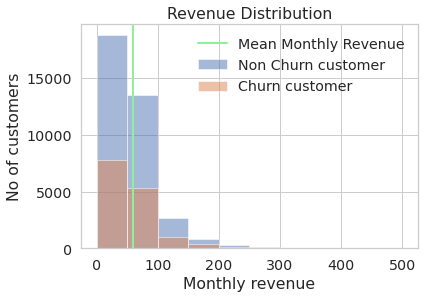

In [15]:
plt.hist(non_churn_df['MonthlyRevenue'],bins=[0,50,100,150,200,250,300,350,400,450,500],alpha=0.5, label='Non Churn customer')
plt.hist(churn_df['MonthlyRevenue'],bins=[0,50,100,150,200,250,300,350,400,450,500],alpha=0.5,label='Churn customer')
mean_rev=df['MonthlyRevenue'].mean()
plt.axvline(mean_rev,label='Mean Monthly Revenue',color='#91ee9a',linewidth=2)
plt.ylabel("No of customers")
plt.xlabel("Monthly revenue")
plt.legend()
plt.tight_layout()
plt.title('Revenue Distribution')
plt.show()

Customers with lower monthly revenue churn more than higher monthly revenue.

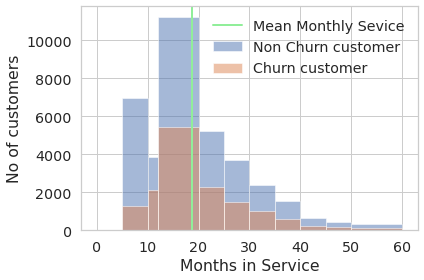

In [16]:
plt.hist(non_churn_df['MonthsInService'],bins=[0,5,10,12,20,25,30,35,40,45,50,60],alpha=0.5, label='Non Churn customer')
plt.hist(churn_df['MonthsInService'],bins=[0,5,10,12,20,25,30,35,40,45,50,60],alpha=0.5,label='Churn customer')
mean_rev=df['MonthsInService'].mean()
plt.axvline(mean_rev,label='Mean Monthly Sevice',color='#91ee9a',linewidth=2)
plt.ylabel("No of customers")
plt.xlabel("Months in Service")
plt.legend()
plt.tight_layout()
plt.show()

New customers and old customers are more loyal and less suceptible to churn

In [17]:
df['ChurnSubs']=df['UniqueSubs']-df['ActiveSubs']

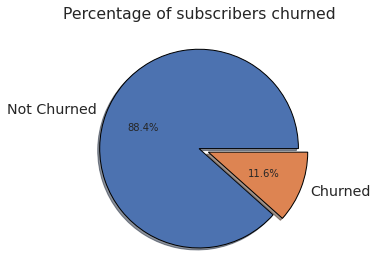

In [18]:
slices=[df['ActiveSubs'].sum(),df['ChurnSubs'].sum()]
labels=['Not Churned','Churned']
explode=[0,0.1]
plt.pie(slices,labels=labels,explode=explode,wedgeprops={'edgecolor':'black'},shadow=True,autopct='%1.1f%%')
plt.title("Percentage of subscribers churned")
plt.tight_layout()
plt.show()

11.6% of active subscribers have churned.

In [19]:
retention_df=df[df['MadeCallToRetentionTeam']=='Yes']
print ("Total No of customer made call to CSR for retention purpose {}".format(retention_df.shape[0]))
print("No of customer churn after making call {}".format(retention_df[retention_df['Churn']=='Yes'].shape[0]))
print("No of customer retain after making call {}".format(retention_df[retention_df['Churn']=='No'].shape[0]))
print ("Sucess rate of rention call  {}".format(retention_df[retention_df['Churn']=='No'].shape[0]/retention_df.shape[0]))

Total No of customer made call to CSR for retention purpose 1745
No of customer churn after making call 786
No of customer retain after making call 959
Sucess rate of rention call  0.5495702005730659


In [20]:
retention_offer_df=df[df['RetentionOffersAccepted']>0]
no_cust_with_ret_offer=retention_offer_df.shape[0]
print("Total customer accepted the retention offer {}".format(no_cust_with_ret_offer))
print("conversion rate customer making call for retention offer then accepting it {}"
      .format(no_cust_with_ret_offer/retention_df.shape[0]))
print("No of customer churn after accepting retention offer {}"
      .format(retention_offer_df[retention_offer_df['Churn']=='Yes'].shape[0]))
print("No of customer retain after accepting retention offer {}"
      .format(retention_offer_df[retention_offer_df['Churn']=='No'].shape[0]))
print("Success rate of  retention offer {}"
      .format(retention_offer_df[retention_offer_df['Churn']=='No'].shape[0]/no_cust_with_ret_offer))

Total customer accepted the retention offer 881
conversion rate customer making call for retention offer then accepting it 0.5048710601719197
No of customer churn after accepting retention offer 362
No of customer retain after accepting retention offer 519
Success rate of  retention offer 0.5891032917139614


In [21]:
df['IncomeGroup'].nunique()

10

In [22]:
income_groups = df['IncomeGroup'].unique()

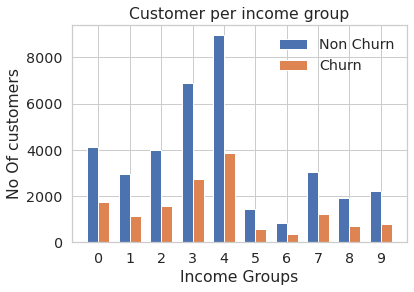

In [23]:
x =  income_groups # the label locations
width = 0.35  # the width of the bars
fig, ax = plt.subplots()
ax.bar(x-width/2, non_churn_df.groupby(['IncomeGroup']).count()['Churn'], width = width, label='Non Churn')
ax.bar(x+width/2, churn_df.groupby(['IncomeGroup']).count()['Churn'], width = width, label='Churn')
ax.set_ylabel('No Of customers')
ax.set_title('Customer per income group')
ax.set_xticks(x)
ax.set_xticklabels(income_groups)
plt.xlabel("Income Groups")
ax.legend()

#on_churn_df.groupby(['IncomeGroup']).count()['Churn'].plot(kind='bar')
#churn_df.groupby(['IncomeGroup']).count()['Churn'].plot(kind='bar')

Middle income group churn more than others

In [24]:
df['CreditRating'].unique()

array(['1-Highest', '4-Medium', '3-Good', '6-VeryLow', '2-High', '5-Low',
       '7-Lowest'], dtype=object)

In [25]:
replace_map = {'CreditRating': {'7-Lowest': 1, '6-VeryLow': 2, '5-Low': 3, '4-Medium': 4, '3-Good': 5, '2-High': 6, '1-Highest': 7 }}

In [26]:
df_replace = df.copy()
df_replace.replace(replace_map, inplace=True)
non_churn_df.replace(replace_map, inplace=True)
churn_df.replace(replace_map, inplace=True)

In [27]:
Credit_Rating = df_replace['CreditRating'].unique()
Credit_Rating

array([7, 4, 5, 2, 6, 3, 1])

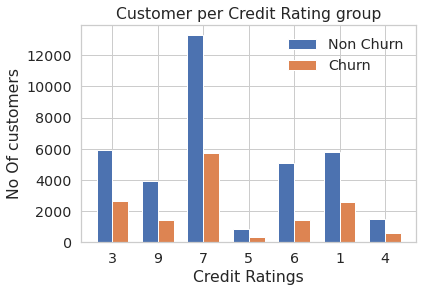

In [28]:
x =  Credit_Rating # the label locations
width = 0.35  # the width of the bars
fig, ax = plt.subplots()
ax.bar(x - width/2, non_churn_df.groupby(['CreditRating']).count()['Churn'], width = width, label='Non Churn')
ax.bar(x + width/2, churn_df.groupby(['CreditRating']).count()['Churn'], width = width, label='Churn')
ax.set_ylabel('No Of customers')
ax.set_title('Customer per Credit Rating group')
ax.set_xticks(x)
ax.set_xticklabels(income_groups)
plt.xlabel("Credit Ratings")
ax.legend()

Credit rating has a direct impact on churn rate with lowest credit rating customers seem to be churned more than others

In [29]:
from sklearn.preprocessing import LabelEncoder

In [30]:
df['State'] = df['ServiceArea'].str[0:3]
df['City_Neighborhood'] = df['ServiceArea'].str[-6:]
lb_make_States = LabelEncoder()
lb_make_City_Neighborhood = LabelEncoder()
df['State'] = lb_make_States.fit_transform(df['State'].astype(str))
df['City_Neighborhood'] = lb_make_City_Neighborhood.fit_transform(df['City_Neighborhood'].astype(str))
df =  df.drop(["ServiceArea"], axis=1)

In [31]:
binary_cols=[]
multi_Value=[]
for col in df.columns :
    if df[col].dtype =='object':
        if df[col].unique().shape[0]==2:
            binary_cols.append(col)
        else:
            multi_Value.append(col)

In [32]:
binary_cols

['Churn',
 'ChildrenInHH',
 'HandsetRefurbished',
 'HandsetWebCapable',
 'TruckOwner',
 'RVOwner',
 'Homeownership',
 'BuysViaMailOrder',
 'RespondsToMailOffers',
 'OptOutMailings',
 'NonUSTravel',
 'OwnsComputer',
 'HasCreditCard',
 'NewCellphoneUser',
 'NotNewCellphoneUser',
 'OwnsMotorcycle',
 'MadeCallToRetentionTeam']

In [33]:
multi_Value

['HandsetPrice', 'CreditRating', 'PrizmCode', 'Occupation', 'MaritalStatus']

In [34]:
for col in multi_Value:
  print(col,df[col].unique())

HandsetPrice ['30' 'Unknown' '10' '80' '150' '300' '40' '200' '100' '130' '60' '400'
 '240' '250' '180' '500']
CreditRating ['1-Highest' '4-Medium' '3-Good' '6-VeryLow' '2-High' '5-Low' '7-Lowest']
PrizmCode ['Suburban' 'Town' 'Other' 'Rural']
Occupation ['Professional' 'Crafts' 'Other' 'Self' 'Retired' 'Homemaker' 'Clerical'
 'Student']
MaritalStatus ['No' 'Yes' 'Unknown']


In [35]:
for col in binary_cols:
  print(col,df[col].unique())

Churn ['Yes' 'No']
ChildrenInHH ['No' 'Yes']
HandsetRefurbished ['No' 'Yes']
HandsetWebCapable ['Yes' 'No']
TruckOwner ['No' 'Yes']
RVOwner ['No' 'Yes']
Homeownership ['Known' 'Unknown']
BuysViaMailOrder ['Yes' 'No']
RespondsToMailOffers ['Yes' 'No']
OptOutMailings ['No' 'Yes']
NonUSTravel ['No' 'Yes']
OwnsComputer ['Yes' 'No']
HasCreditCard ['Yes' 'No']
NewCellphoneUser ['No' 'Yes']
NotNewCellphoneUser ['No' 'Yes']
OwnsMotorcycle ['No' 'Yes']
MadeCallToRetentionTeam ['Yes' 'No']


In [36]:
df[df['HandsetPrice']=='Unknown'].shape[0]/df.shape[0]

0.5677512880286795

In [37]:
df.drop(['HandsetPrice'], axis=1, inplace=True)

In [38]:
multi_Value.remove('HandsetPrice')

In [39]:
df[df['Homeownership']=='Unknown'].shape[0]/df.shape[0]

0.33420181401453564

In [40]:
df.drop(['Homeownership'], axis=1, inplace=True)

In [41]:
binary_cols.remove('Homeownership')

In [42]:
df[df['MaritalStatus']=='Unknown'].shape[0]/df.shape[0]

0.38591885909064194

In [43]:
df.drop(['MaritalStatus'], axis=1, inplace=True)

In [44]:
multi_Value.remove('MaritalStatus')

In [45]:
def high_corr_and_check(X):
    corr_matrix = X.corr().abs()
    sol = (corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))
                      .stack()
                      .sort_values(ascending=False))
    for index, value in sol.items():
        if value > 0.7:
            print(index,value)
high_corr_and_check(df)

('Handsets', 'HandsetModels') 0.8878385039951391
('UniqueSubs', 'ChurnSubs') 0.8539105463056147
('MonthlyMinutes', 'ReceivedCalls') 0.8278362139399287
('BlockedCalls', 'DroppedBlockedCalls') 0.8163284923290312
('MonthlyRevenue', 'OverageMinutes') 0.7878343130416475
('UniqueSubs', 'ActiveSubs') 0.7757755146501096
('MonthlyMinutes', 'PeakCallsInOut') 0.7701998180788324
('MonthlyMinutes', 'OffPeakCallsInOut') 0.7637314701082377
('ReceivedCalls', 'PeakCallsInOut') 0.7468919204155855
('OutboundCalls', 'OffPeakCallsInOut') 0.7423107236650122
('ReceivedCalls', 'OffPeakCallsInOut') 0.7381847831384203
('RetentionCalls', 'RetentionOffersAccepted') 0.7341126582127255
('OutboundCalls', 'InboundCalls') 0.7244162391747182
('UnansweredCalls', 'OffPeakCallsInOut') 0.719626174181966
('DroppedCalls', 'DroppedBlockedCalls') 0.7154196426170009
('MonthlyRevenue', 'MonthlyMinutes') 0.7129118122412105
('OutboundCalls', 'PeakCallsInOut') 0.7104873582718215


In [ ]:
# Removing values with high correlation
df = df.drop(['HandsetModels', 'UniqueSubs','PeakCallsInOut','OffPeakCallsInOut','DroppedBlockedCalls','RetentionCalls','InboundCalls','OverageMinutes','ReceivedCalls'],axis=1)

In [47]:
label = LabelEncoder() 
for col in multi_Value:
    df[col] = label.fit_transform(df[col].astype(str))
df

,Churn,MonthlyRevenue,MonthlyMinutes,TotalRecurringCharge,DirectorAssistedCalls,RoamingCalls,PercChangeMinutes,PercChangeRevenues,DroppedCalls,BlockedCalls,UnansweredCalls,CustomerCareCalls,ThreewayCalls,OutboundCalls,CallForwardingCalls,CallWaitingCalls,MonthsInService,ActiveSubs,Handsets,CurrentEquipmentDays,AgeHH1,AgeHH2,ChildrenInHH,HandsetRefurbished,HandsetWebCapable,TruckOwner,RVOwner,BuysViaMailOrder,RespondsToMailOffers,OptOutMailings,NonUSTravel,OwnsComputer,HasCreditCard,RetentionOffersAccepted,NewCellphoneUser,NotNewCellphoneUser,ReferralsMadeBySubscriber,IncomeGroup,OwnsMotorcycle,AdjustmentsToCreditRating,MadeCallToRetentionTeam,CreditRating,PrizmCode,Occupation,ChurnSubs,State,City_Neighborhood
0,Yes,24.000000,219.000000,22.000000,0.250000,0.000000,-157.000000,-19.000000,0.7,0.7,6.3,0.0,0.0,0.0,0.0,0.3,61,1,2.0,361.0,62.0,0.0,No,No,Yes,No,No,Yes,Yes,No,No,Yes,Yes,0,No,No,0,4,No,0,Yes,0,2,4,1,48,535
1,Yes,16.990000,10.000000,17.000000,0.000000,0.000000,-4.000000,0.000000,0.3,0.0,2.7,0.0,0.0,0.0,0.0,0.0,58,1,2.0,1504.0,40.0,42.0,Yes,No,No,No,No,Yes,Yes,No,No,Yes,Yes,0,Yes,No,0,5,No,0,No,3,2,4,0,45,304
2,No,38.000000,8.000000,38.000000,0.000000,0.000000,-2.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.3,0.0,0.0,60,1,1.0,1812.0,26.0,26.0,Yes,No,No,No,No,No,No,No,No,No,Yes,0,Yes,No,0,6,No,0,No,2,3,1,0,27,434
3,No,82.280000,1312.000000,75.000000,1.240000,0.000000,157.000000,8.100000,52.0,7.7,76.0,4.3,1.3,370.3,0.0,22.7,59,2,9.0,458.0,30.0,0.0,No,No,Yes,No,No,Yes,Yes,No,No,No,Yes,0,Yes,No,0,6,No,0,No,3,0,3,0,45,304
4,Yes,17.140000,0.000000,17.000000,0.000000,0.000000,0.000000,-0.200000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,53,2,4.0,852.0,46.0,54.0,No,No,No,No,No,Yes,Yes,No,No,Yes,Yes,0,No,Yes,0,9,No,1,No,0,0,4,0,41,674
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51042,Yes,58.834492,525.653416,46.830088,0.895229,1.236244,-11.547908,-1.191985,9.3,2.7,48.3,0.0,0.0,17.0,0.0,0.3,29,1,2.0,526.0,68.0,64.0,No,Yes,Yes,No,No,Yes,Yes,No,No,No,Yes,0,No,No,0,6,No,0,No,0,2,3,0,24,612
51043,No,95.170000,1745.000000,85.000000,0.990000,4.700000,122.000000,15.900000,16.7,0.7,41.3,0.0,0.0,89.7,0.0,14.3,29,1,2.0,464.0,48.0,48.0,Yes,No,Yes,No,No,Yes,Yes,No,No,Yes,Yes,0,No,No,0,9,No,1,No,2,0,3,0,24,105
51044,Yes,58.834492,525.653416,46.830088,0.895229,1.236244,-11.547908,-1.191985,71.7,4.3,287.0,1.3,13.7,430.3,0.0,6.7,25,1,3.0,378.0,36.0,0.0,No,No,Yes,No,No,No,No,No,No,No,Yes,0,No,No,0,7,No,1,No,4,0,0,0,24,105
51045,No,58.834492,525.653416,46.830088,0.895229,1.236244,-11.547908,-1.191985,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,31,1,2.0,433.0,32.0,0.0,Yes,No,Yes,No,No,No,No,No,No,No,No,0,No,No,0,9,No,0,No,4,0,3,0,30,540


In [48]:
Binary_cols_expect_churn=binary_cols[1:]
df_binary = df[Binary_cols_expect_churn]
df_binary

,ChildrenInHH,HandsetRefurbished,HandsetWebCapable,TruckOwner,RVOwner,BuysViaMailOrder,RespondsToMailOffers,OptOutMailings,NonUSTravel,OwnsComputer,HasCreditCard,NewCellphoneUser,NotNewCellphoneUser,OwnsMotorcycle,MadeCallToRetentionTeam
0,No,No,Yes,No,No,Yes,Yes,No,No,Yes,Yes,No,No,No,Yes
1,Yes,No,No,No,No,Yes,Yes,No,No,Yes,Yes,Yes,No,No,No
2,Yes,No,No,No,No,No,No,No,No,No,Yes,Yes,No,No,No
3,No,No,Yes,No,No,Yes,Yes,No,No,No,Yes,Yes,No,No,No
4,No,No,No,No,No,Yes,Yes,No,No,Yes,Yes,No,Yes,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51042,No,Yes,Yes,No,No,Yes,Yes,No,No,No,Yes,No,No,No,No
51043,Yes,No,Yes,No,No,Yes,Yes,No,No,Yes,Yes,No,No,No,No
51044,No,No,Yes,No,No,No,No,No,No,No,Yes,No,No,No,No
51045,Yes,No,Yes,No,No,No,No,No,No,No,No,No,No,No,No


In [49]:
#dfDummies_binary = pd.get_dummies(df_binary, prefix = df_binary.columns)
#dfDummies_binary.shape

In [50]:
binary_cols.remove('Churn')

In [51]:
df_cleaned = pd.get_dummies(df, columns=binary_cols, drop_first=True)

In [52]:
df_cleaned.head()

,Churn,MonthlyRevenue,MonthlyMinutes,TotalRecurringCharge,DirectorAssistedCalls,RoamingCalls,PercChangeMinutes,PercChangeRevenues,DroppedCalls,BlockedCalls,UnansweredCalls,CustomerCareCalls,ThreewayCalls,OutboundCalls,CallForwardingCalls,CallWaitingCalls,MonthsInService,ActiveSubs,Handsets,CurrentEquipmentDays,AgeHH1,AgeHH2,RetentionOffersAccepted,ReferralsMadeBySubscriber,IncomeGroup,AdjustmentsToCreditRating,CreditRating,PrizmCode,Occupation,ChurnSubs,State,City_Neighborhood,ChildrenInHH_Yes,HandsetRefurbished_Yes,HandsetWebCapable_Yes,TruckOwner_Yes,RVOwner_Yes,BuysViaMailOrder_Yes,RespondsToMailOffers_Yes,OptOutMailings_Yes,NonUSTravel_Yes,OwnsComputer_Yes,HasCreditCard_Yes,NewCellphoneUser_Yes,NotNewCellphoneUser_Yes,OwnsMotorcycle_Yes,MadeCallToRetentionTeam_Yes
0,Yes,24.00,219.0,22.0,0.25,0.0,-157.0,-19.0,0.7,0.7,6.3,0.0,0.0,0.0,0.0,0.3,61,1,2.0,361.0,62.0,0.0,0,0,4,0,0,2,4,1,48,535,0,0,1,0,0,1,1,0,0,1,1,0,0,0,1
1,Yes,16.99,10.0,17.0,0.00,0.0,-4.0,0.0,0.3,0.0,2.7,0.0,0.0,0.0,0.0,0.0,58,1,2.0,1504.0,40.0,42.0,0,0,5,0,3,2,4,0,45,304,1,0,0,0,0,1,1,0,0,1,1,1,0,0,0
2,No,38.00,8.0,38.0,0.00,0.0,-2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.3,0.0,0.0,60,1,1.0,1812.0,26.0,26.0,0,0,6,0,2,3,1,0,27,434,1,0,0,0,0,0,0,0,0,0,1,1,0,0,0
3,No,82.28,1312.0,75.0,1.24,0.0,157.0,8.1,52.0,7.7,76.0,4.3,1.3,370.3,0.0,22.7,59,2,9.0,458.0,30.0,0.0,0,0,6,0,3,0,3,0,45,304,0,0,1,0,0,1,1,0,0,0,1,1,0,0,0
4,Yes,17.14,0.0,17.0,0.00,0.0,0.0,-0.2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,53,2,4.0,852.0,46.0,54.0,0,0,9,1,0,0,4,0,41,674,0,0,0,0,0,1,1,0,0,1,1,0,1,0,0


In [53]:
replace_map = {'Churn': {'Yes': 1, 'No': 0 }}
df_cleaned.replace(replace_map, inplace=True)
df_cleaned.head()

,Churn,MonthlyRevenue,MonthlyMinutes,TotalRecurringCharge,DirectorAssistedCalls,RoamingCalls,PercChangeMinutes,PercChangeRevenues,DroppedCalls,BlockedCalls,UnansweredCalls,CustomerCareCalls,ThreewayCalls,OutboundCalls,CallForwardingCalls,CallWaitingCalls,MonthsInService,ActiveSubs,Handsets,CurrentEquipmentDays,AgeHH1,AgeHH2,RetentionOffersAccepted,ReferralsMadeBySubscriber,IncomeGroup,AdjustmentsToCreditRating,CreditRating,PrizmCode,Occupation,ChurnSubs,State,City_Neighborhood,ChildrenInHH_Yes,HandsetRefurbished_Yes,HandsetWebCapable_Yes,TruckOwner_Yes,RVOwner_Yes,BuysViaMailOrder_Yes,RespondsToMailOffers_Yes,OptOutMailings_Yes,NonUSTravel_Yes,OwnsComputer_Yes,HasCreditCard_Yes,NewCellphoneUser_Yes,NotNewCellphoneUser_Yes,OwnsMotorcycle_Yes,MadeCallToRetentionTeam_Yes
0,1,24.00,219.0,22.0,0.25,0.0,-157.0,-19.0,0.7,0.7,6.3,0.0,0.0,0.0,0.0,0.3,61,1,2.0,361.0,62.0,0.0,0,0,4,0,0,2,4,1,48,535,0,0,1,0,0,1,1,0,0,1,1,0,0,0,1
1,1,16.99,10.0,17.0,0.00,0.0,-4.0,0.0,0.3,0.0,2.7,0.0,0.0,0.0,0.0,0.0,58,1,2.0,1504.0,40.0,42.0,0,0,5,0,3,2,4,0,45,304,1,0,0,0,0,1,1,0,0,1,1,1,0,0,0
2,0,38.00,8.0,38.0,0.00,0.0,-2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.3,0.0,0.0,60,1,1.0,1812.0,26.0,26.0,0,0,6,0,2,3,1,0,27,434,1,0,0,0,0,0,0,0,0,0,1,1,0,0,0
3,0,82.28,1312.0,75.0,1.24,0.0,157.0,8.1,52.0,7.7,76.0,4.3,1.3,370.3,0.0,22.7,59,2,9.0,458.0,30.0,0.0,0,0,6,0,3,0,3,0,45,304,0,0,1,0,0,1,1,0,0,0,1,1,0,0,0
4,1,17.14,0.0,17.0,0.00,0.0,0.0,-0.2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,53,2,4.0,852.0,46.0,54.0,0,0,9,1,0,0,4,0,41,674,0,0,0,0,0,1,1,0,0,1,1,0,1,0,0


In [54]:
y = df_cleaned.pop('Churn')

## 6. Training and Testing the Model <a id=section6></a>

### 6.1 Splitting data into training and test datasets <a id=section601></a>

In [55]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df_cleaned, y, test_size=0.3, random_state=1, stratify=y)

In [56]:
print(X_train.shape,y_train.shape)

(35732, 46) (35732,)


In [57]:
print(X_test.shape,y_test.shape)

(15315, 46) (15315,)


## 7. Deep Learning using Keras API <a id=section7></a>

### 7.1 Building deep learning model <a id=section701></a>

Epoch 1/500
1117/1117 [==============================] - 7s 6ms/step - loss: 4.0041 - accuracy: 0.6153 - val_loss: 0.7975 - val_accuracy: 0.6126
Epoch 2/500
1117/1117 [==============================] - 6s 5ms/step - loss: 0.7114 - accuracy: 0.6643 - val_loss: 0.6132 - val_accuracy: 0.6940
Epoch 3/500
1117/1117 [==============================] - 6s 5ms/step - loss: 0.6158 - accuracy: 0.7007 - val_loss: 0.6309 - val_accuracy: 0.6574
Epoch 4/500
1117/1117 [==============================] - 6s 5ms/step - loss: 0.5984 - accuracy: 0.7049 - val_loss: 0.5873 - val_accuracy: 0.7122
Epoch 5/500
1117/1117 [==============================] - 6s 5ms/step - loss: 0.5919 - accuracy: 0.7100 - val_loss: 0.5882 - val_accuracy: 0.7123
Epoch 6/500
1117/1117 [==============================] - 6s 5ms/step - loss: 0.5893 - accuracy: 0.7088 - val_loss: 0.5905 - val_accuracy: 0.7125
Epoch 7/500
1117/1117 [==============================] - 6s 5ms/step - loss: 0.5832 - accuracy: 0.7145 - val_loss: 0.5935 - val_ac

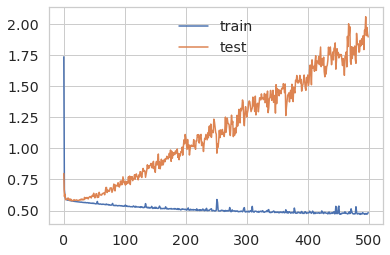

In [58]:
from keras.layers import Dense
from keras.models import Sequential
from matplotlib import pyplot
# define model
model = Sequential()
# Adding layers with activation as relu
model.add(Dense(500, input_dim=46, activation='relu'))
model.add(Dense(500, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
# fit model
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=500, verbose=1)
# evaluate the model
_, train_acc = model.evaluate(X_train, y_train, verbose=0)
_, test_acc = model.evaluate(X_test, y_test, verbose=0)
print('Train: %.3f, Test: %.3f' % (train_acc, test_acc))
# plot training history
pyplot.plot(history.history['loss'], label='train')
pyplot.plot(history.history['val_loss'], label='test')
pyplot.legend()
pyplot.show()

Here as the algorithm runs full, it achieves minimum validation loss earlier and training loss is constant over time. Hence the algorithm was not required to run for that.

### 7.2 Exploring Callbacks, Dropouts and Regularization <a id=section702></a>

Dropouts: Dropout is a regularization method that tries to minimize the effect of ovefitting. Here particular node in a layer is randomly dropped out thus making a look alike layer with no dropped out nodes of the hidden layer. Nodes are dropped out randomly and allows algorithm to learn by giving opportunity to all nodes.

Callbacks: Callbacks are methods called after execution of each epoch. They are primarily used to monitor the algorithm run and store necessary variables. Two callback functions used here are:
 Early stopping callback: This monitors the given variable to check if there is no change in the value of variable over a given time (patience) and asks the algortihm to stop processing further. This reduces the processing time.
 Model Checkpoint: Here the model with best monitor variable value is stored in a file which can be used later to get the best result.
 
Regularization: To avoid overfitting, regularization is used to avoid algorithm to learn completely from the training data and have very low validation accuracy or high validation loss. Essentially system restricts blowing up of parameters during training the algorithm. 


Epoch 00001: val_accuracy improved from -inf to 0.70865, saving model to best_model.h5

Epoch 00002: val_accuracy improved from 0.70865 to 0.71172, saving model to best_model.h5

Epoch 00003: val_accuracy improved from 0.71172 to 0.71179, saving model to best_model.h5

Epoch 00004: val_accuracy did not improve from 0.71179

Epoch 00005: val_accuracy did not improve from 0.71179

Epoch 00006: val_accuracy did not improve from 0.71179

Epoch 00007: val_accuracy did not improve from 0.71179

Epoch 00008: val_accuracy did not improve from 0.71179

Epoch 00009: val_accuracy did not improve from 0.71179

Epoch 00010: val_accuracy did not improve from 0.71179

Epoch 00011: val_accuracy did not improve from 0.71179

Epoch 00012: val_accuracy did not improve from 0.71179

Epoch 00013: val_accuracy did not improve from 0.71179

Epoch 00014: val_accuracy did not improve from 0.71179

Epoch 00015: val_accuracy did not improve from 0.71179

Epoch 00016: val_accuracy did not improve from 0.71179

E

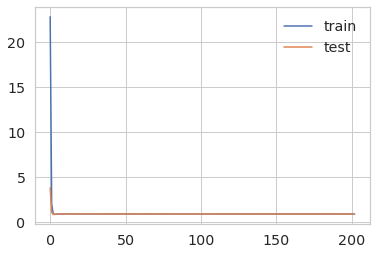

In [60]:
from keras.layers import Dense
from keras.models import Sequential
from matplotlib import pyplot
from keras.layers import Dense,Dropout
from keras.callbacks import EarlyStopping
from keras.callbacks import ModelCheckpoint
from keras.models import load_model
model = Sequential()
model.add(Dense(500, input_dim=46, activation='relu',kernel_regularizer='l1'))
model.add(Dropout(0.4))
model.add(Dense(500, activation='relu',kernel_regularizer='l1'))
model.add(Dropout(0.2))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=200)
mc = ModelCheckpoint('best_model.h5', monitor='val_accuracy', mode='max', verbose=1, save_best_only=True)
# fit model
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=500, verbose=0, callbacks=[es, mc])
# load the saved model
saved_model = load_model('best_model.h5')
# evaluate the model
_, train_acc = saved_model.evaluate(X_train, y_train, verbose=0)
_, test_acc = saved_model.evaluate(X_test, y_test, verbose=0)
print('Train: %.3f, Test: %.3f' % (train_acc, test_acc))
# plot training history
pyplot.plot(history.history['loss'], label='train')
pyplot.plot(history.history['val_loss'], label='test')
pyplot.legend()
pyplot.show()

## 8. Conclusion <a id=section8></a>

Deep learning model can predict customer churn with an accuracy of 71.2 % 